In [310]:
#Import Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import dataframe_image as dfi
from scipy import stats
import seaborn as sns

In [311]:
# Load dataset
df = pd.read_csv('Final_data.csv')
df.head()

,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj,State
0,12/31/2019,488,14.0,36.1,17.30,50.409836,486.45,Alabama
1,12/31/2019,824,10.9,36.1,23.00,50.970874,810.11,Arizona
2,12/31/2019,193,13.6,37.4,15.60,55.958549,192.48,Arkansas
3,12/31/2019,5566,10.1,26.2,12.25,51.257636,5558.86,California
4,12/31/2019,545,7.0,23.8,17.20,47.339450,538.54,Colorado


In [312]:
df.sort_values(by=['Year'], inplace=True, ascending=True)
df = df.loc[df['State']=='California']
df

,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj,State
1155,12/31/1995,2466,4.9,13.9,4.80,48.134631,2452.11,California
1107,12/31/1996,2496,5.4,14.8,4.80,48.397436,2473.23,California
1059,12/31/1997,2873,5.9,15.8,4.80,48.172642,2833.51,California
1011,12/31/1998,2914,6.4,16.7,4.80,49.897049,2871.93,California
963,12/31/1999,3252,6.9,17.7,4.80,47.693727,3206.00,California
915,12/31/2000,3515,7.5,18.7,3.30,50.298720,3502.93,California
867,12/31/2001,3571,7.4,20.2,1.80,48.753850,3519.36,California
819,12/31/2002,4041,7.3,21.7,4.50,49.616432,3995.01,California
771,12/31/2003,4378,7.2,23.2,4.30,48.560987,4330.13,California
723,12/31/2004,5576,7.2,21.5,4.30,50.394548,5525.16,California


In [313]:
df_output = df.tail(1)
lastyear_df = df_output.drop(columns=['Year', 'Waitlist','Diabetes','Obesity','Overdose','Pct_O','State'])
lastyear_df = lastyear_df.reset_index(drop=True)
lastyear_df

,Total_Adj
0,5558.86


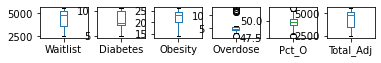

In [314]:
df.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
plt.show()

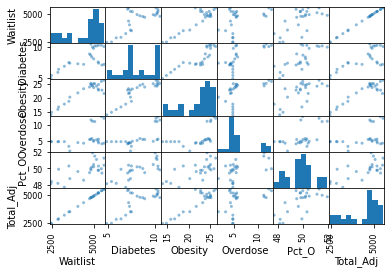

In [315]:
# scatter plot matrix
pd.plotting.scatter_matrix(df)
plt.show()

In [316]:
#Describe data
df.describe()

,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000
mean,4456.600000,8.148000,21.976000,6.110000,49.800142,4422.01480
std,1004.318426,1.675092,3.629656,3.048702,1.070541,1003.67671
min,2466.000000,4.900000,13.900000,1.800000,47.693727,2452.11000
25%,3571.000000,7.200000,20.200000,4.500000,49.431193,3519.36000
50%,4856.000000,7.600000,23.200000,4.900000,49.897049,4808.65000
75%,5228.000000,10.000000,24.700000,5.600000,50.298720,5194.75000
max,5576.000000,10.500000,26.200000,12.800000,51.908553,5558.86000


In [317]:
#Correlation Matrix
corr_matrix = df[["Diabetes", "Obesity", "Overdose", "Pct_O"]].corr()
print(corr_matrix)

          Diabetes   Obesity  Overdose     Pct_O
Diabetes  1.000000  0.879103  0.675709  0.752649
Obesity   0.879103  1.000000  0.515013  0.690730
Overdose  0.675709  0.515013  1.000000  0.530191
Pct_O     0.752649  0.690730  0.530191  1.000000


In [318]:
#Assign variables for regression
X = df[['Diabetes','Obesity','Overdose','Pct_O']]
y = df['Total_Adj'].values.reshape(-1,1)
print(X.shape, y.shape)

(25, 4) (25, 1)


In [319]:
#Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [320]:
#Create model
model = LinearRegression()

In [321]:
#fit the model to the training data and calculate the scores for the training and testing data
#Begin
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
#End
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.9151904045082683
Testing Score: 0.7307920048488923


Text(0.5, 1.0, 'Residual Plot')

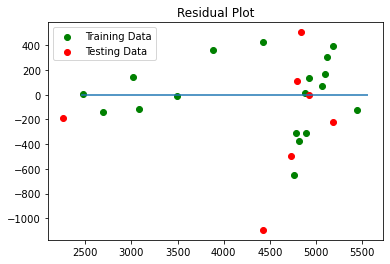

In [322]:
#Plot Residuals for Training and Testing Data
#Begin
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="green", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
#End

In [323]:
#R2 of original model
r_sq = model.score(X, y)
print('coefficient of determination', r_sq)

coefficient of determination 0.8660729413286492


In [324]:
print(model.intercept_)

[-4695.17105907]


In [325]:
print(model.coef_)

[[-171.83989625  315.69950931   -4.88768449   71.36834915]]


In [326]:
#Make a Prediction using model
predictedTotal_Adj = model.predict([[10.77,32,19.9,49]])
print(predictedTotal_Adj)

[[6956.28174349]]


In [327]:
print(X_train.shape)

(18, 4)


In [328]:
print(y_train.shape)

(18, 1)


In [329]:
print(y_test.shape)

(7, 1)


In [330]:
print(X_test.shape)

(7, 4)


In [331]:
modeldetail = sm.OLS(y, X)
resultstest = modeldetail.fit()

In [332]:
print(X.shape)

(25, 4)


In [333]:
print(y.shape)

(25, 1)


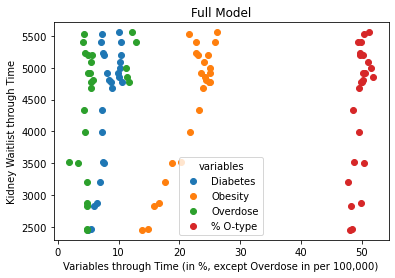

In [334]:
plt.scatter(X[('Diabetes')], y, label='Diabetes')
plt.scatter(X[('Obesity')], y, label='Obesity')
plt.scatter(X[('Overdose')], y, label='Overdose')
plt.scatter(X[('Pct_O')], y, label='% O-type')
plt.title('Full Model')
plt.xlabel('Variables through Time (in %, except Overdose in per 100,000)')
plt.ylabel('Kidney Waitlist through Time')
plt.legend(title='variables',loc='lower center')
plt.savefig('images/California_full.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)
plt.show()

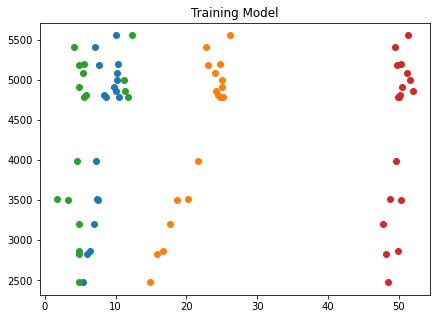

In [335]:
fig = plt.figure()
plt.scatter(X_train[('Diabetes')], y_train)
plt.scatter(X_train[('Obesity')], y_train)
plt.scatter(X_train[('Overdose')], y_train)
plt.scatter(X_train[('Pct_O')], y_train)
plt.title('Training Model')
fig.set_size_inches(7,5)
plt.show()

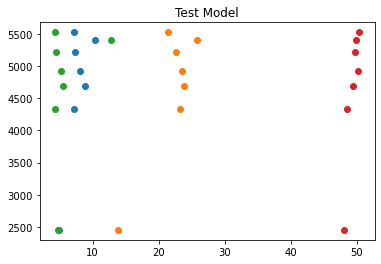

In [336]:
plt.scatter(X_test[('Diabetes')], y_test)
plt.scatter(X_test[('Obesity')], y_test)
plt.scatter(X_test[('Overdose')], y_test)
plt.scatter(X_test[('Pct_O')], y_test)
plt.title('Test Model')
plt.show()

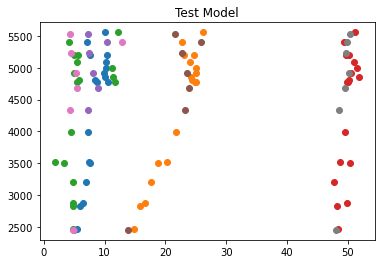

In [337]:
plt.scatter(X_train[('Diabetes')], y_train)
plt.scatter(X_train[('Obesity')], y_train)
plt.scatter(X_train[('Overdose')], y_train)
plt.scatter(X_train[('Pct_O')], y_train)
plt.scatter(X_test[('Diabetes')], y_test)
plt.scatter(X_test[('Obesity')], y_test)
plt.scatter(X_test[('Overdose')], y_test)
plt.scatter(X_test[('Pct_O')], y_test)
plt.title('Test Model')
plt.show()

In [338]:
model_lin = sm.OLS.from_formula("Total_Adj ~ Diabetes + Obesity + Overdose + Pct_O", data=df)
result_lin = model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Total_Adj   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     36.25
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           6.70e-09
Time:                        21:36:24   Log-Likelihood:                -181.37
No. Observations:                  25   AIC:                             372.7
Df Residuals:                      20   BIC:                             378.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.048e+04   5120.816     -2.047      0.054   -2.12e+04     198.493
Diabetes    -265.7654    123.892     -2.145      0.044    -524.199      -7.332
Obesity      319.6307     46.612      6.857      0.000     222.400     416.861
Overdose       0.4939     35.762      0.014      0.989     -74.105      75.093
Pct_O        201.6779    111.584      1.807      0.086     -31.083     434.439
==============================================================================
Omnibus:                        1.870   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.393   Jarque-Bera (JB):                1.292
Skew:                           0.554   Prob(JB):                        0.524
Kurtosis:                       2.886   Cond. No.                     3.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [339]:
df


,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj,State
1155,12/31/1995,2466,4.9,13.9,4.80,48.134631,2452.11,California
1107,12/31/1996,2496,5.4,14.8,4.80,48.397436,2473.23,California
1059,12/31/1997,2873,5.9,15.8,4.80,48.172642,2833.51,California
1011,12/31/1998,2914,6.4,16.7,4.80,49.897049,2871.93,California
963,12/31/1999,3252,6.9,17.7,4.80,47.693727,3206.00,California
915,12/31/2000,3515,7.5,18.7,3.30,50.298720,3502.93,California
867,12/31/2001,3571,7.4,20.2,1.80,48.753850,3519.36,California
819,12/31/2002,4041,7.3,21.7,4.50,49.616432,3995.01,California
771,12/31/2003,4378,7.2,23.2,4.30,48.560987,4330.13,California
723,12/31/2004,5576,7.2,21.5,4.30,50.394548,5525.16,California


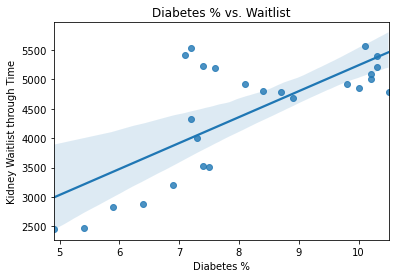

In [340]:
sns.regplot(X[('Diabetes')],y)
plt.title('Diabetes % vs. Waitlist')
plt.xlabel('Diabetes %')
plt.ylabel('Kidney Waitlist through Time')
plt.savefig('images/California_diabetes.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

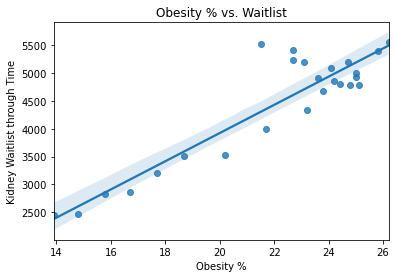

In [341]:
sns.regplot(X[('Obesity')],y)
plt.title('Obesity % vs. Waitlist')
plt.xlabel('Obesity %')
plt.ylabel('Kidney Waitlist through Time')
plt.savefig('images/California_obesity.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

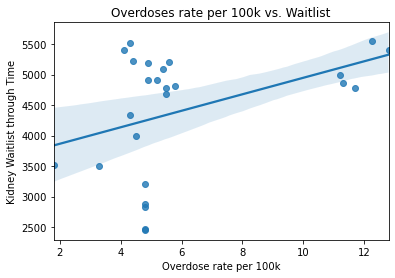

In [342]:
sns.regplot(X[('Overdose')],y)
plt.xlabel('Overdose rate per 100k')
plt.title('Overdoses rate per 100k vs. Waitlist')
plt.ylabel('Kidney Waitlist through Time')
plt.savefig('images/California_overdose.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

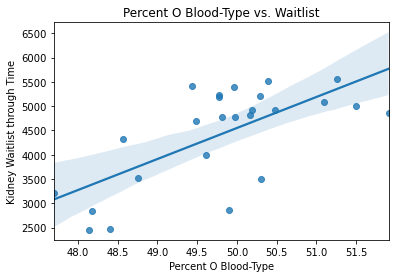

In [343]:
sns.regplot(X[('Pct_O')],y)
plt.xlabel('Percent O Blood-Type')
plt.title('Percent O Blood-Type vs. Waitlist')
plt.ylabel('Kidney Waitlist through Time')
plt.savefig('images/California_pct_O.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

<AxesSubplot:xlabel='Pct_O'>

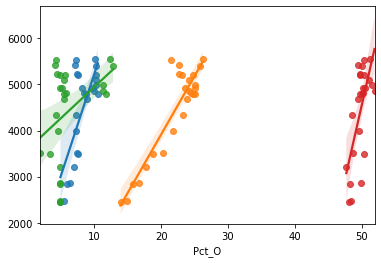

In [344]:
sns.regplot(X[('Diabetes')],y)
sns.regplot(X[('Obesity')],y)
sns.regplot(X[('Overdose')],y)
sns.regplot(X[('Pct_O')],y)

In [345]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
coefficients_transposed = coefficients.T
coefficients_transposed
coefficients_final = coefficients_transposed[1:]
coefficients_final

,0,1,2,3
0,-171.84,315.7,-4.88768,71.3683


In [346]:
test_df = pd.DataFrame([[r_sq,training_score,testing_score,model.intercept_ ,predictedTotal_Adj]])
test_df

,0,1,2,3,4
0,0.866073,0.91519,0.730792,[-4695.171059066153],[[6956.28174349148]]


In [347]:
#dfi.export(test_df, 'test_df.png')

In [348]:
summary_df = pd.concat([test_df, lastyear_df, coefficients_final], axis=1)
summary_df.columns = ['R2','Training Score', 'Test Score', 'Intercept','Forecast based on Natl Avg','Last Waitlist','Coef_Diabetes','Coef_Obesity','Coef_Overdose','Coef_Pct_O']

In [349]:
summary_df

,R2,Training Score,Test Score,Intercept,Forecast based on Natl Avg,Last Waitlist,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O
0,0.866073,0.91519,0.730792,[-4695.171059066153],[[6956.28174349148]],5558.86,-171.84,315.7,-4.88768,71.3683


In [350]:
summary_df.dtypes

R2                            float64
Training Score                float64
Test Score                    float64
Intercept                      object
Forecast based on Natl Avg     object
Last Waitlist                 float64
Coef_Diabetes                  object
Coef_Obesity                   object
Coef_Overdose                  object
Coef_Pct_O                     object
dtype: object

In [351]:
summary_df

,R2,Training Score,Test Score,Intercept,Forecast based on Natl Avg,Last Waitlist,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O
0,0.866073,0.91519,0.730792,[-4695.171059066153],[[6956.28174349148]],5558.86,-171.84,315.7,-4.88768,71.3683


In [352]:
summary_df['Intercept'] = summary_df['Intercept'].astype(int)
summary_df['Forecast based on Natl Avg'] = summary_df['Forecast based on Natl Avg'].astype(int)
summary_df['R2'] = summary_df['R2'].round(decimals=4)
summary_df['Training Score'] = summary_df['Training Score'].round(decimals=4)
summary_df['Test Score'] = summary_df['Test Score'].round(decimals=4)
summary_df = summary_df[['R2','Training Score','Test Score','Intercept','Coef_Diabetes','Coef_Obesity','Coef_Overdose','Coef_Pct_O','Last Waitlist','Forecast based on Natl Avg']]
dfi.export(summary_df, 'images/California_summary.png')

In [353]:
summary_df

,R2,Training Score,Test Score,Intercept,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O,Last Waitlist,Forecast based on Natl Avg
0,0.8661,0.9152,0.7308,-4695,-171.84,315.7,-4.88768,71.3683,5558.86,6956


In [354]:
summaryalt_df = summary_df.style.set_properties(**{'background-color': 'black','color': 'lawngreen','border-color': 'white'})
summaryalt_df

,R2,Training Score,Test Score,Intercept,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O,Last Waitlist,Forecast based on Natl Avg
0,0.866100,0.915200,0.730800,-4695,-171.839896,315.699509,-4.887684,71.368349,5558.860000,6956
